黒の番


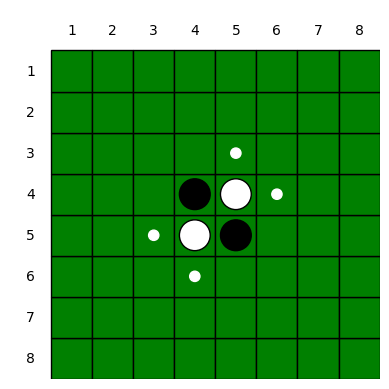

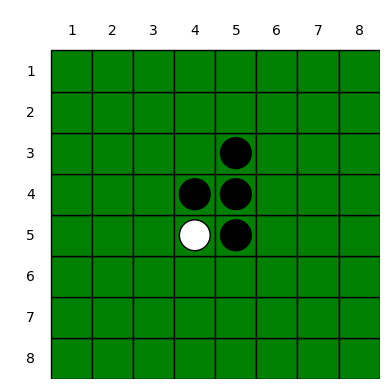

白の番


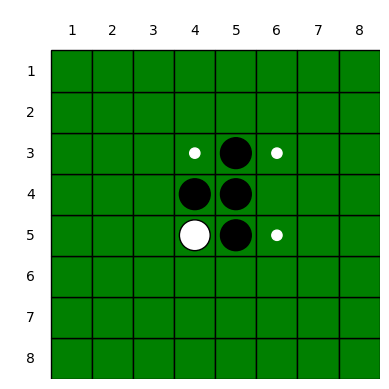

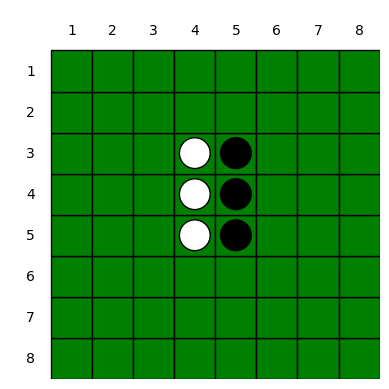

黒の番


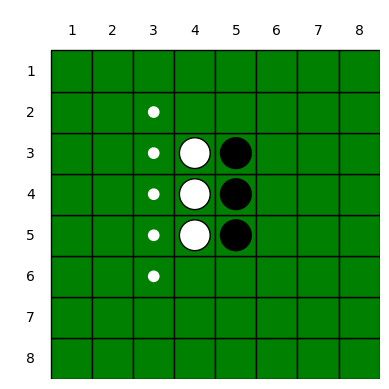

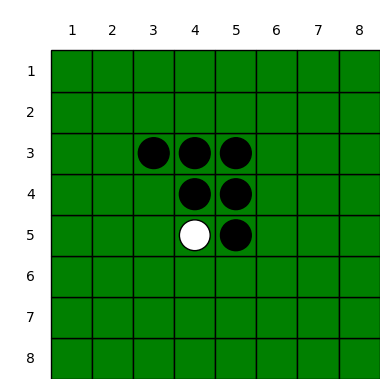

白の番


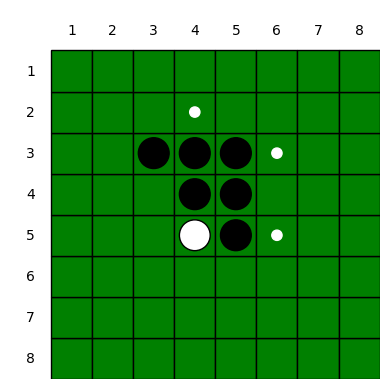

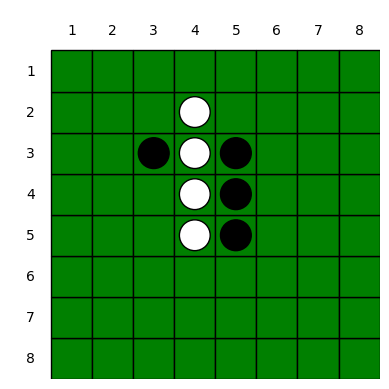

黒の番


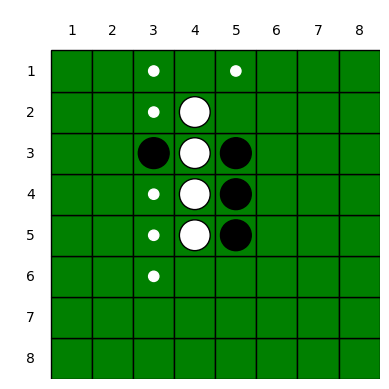

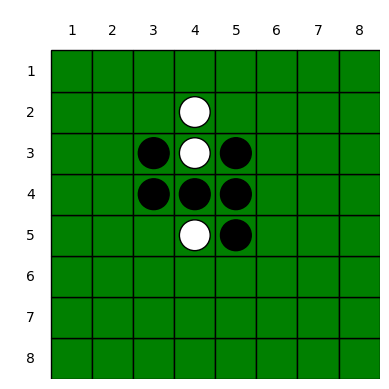

白の番


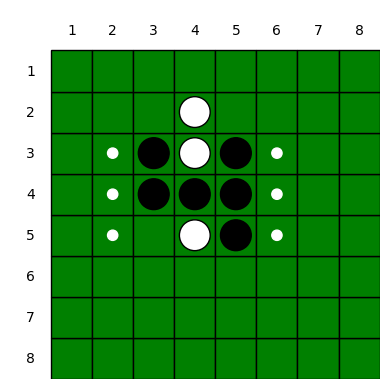

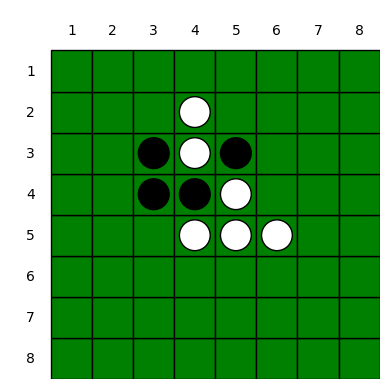

黒の番


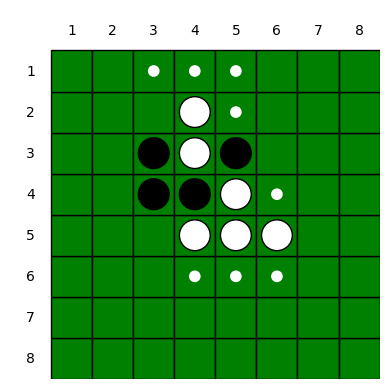

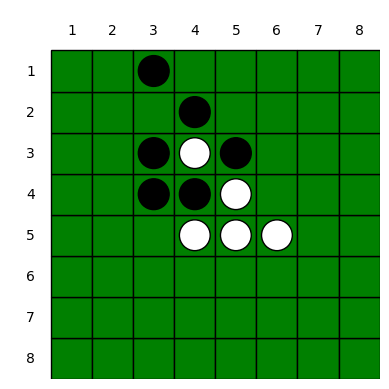

白の番


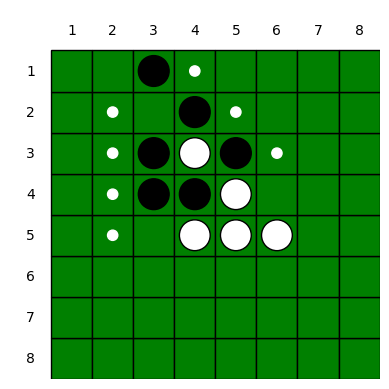

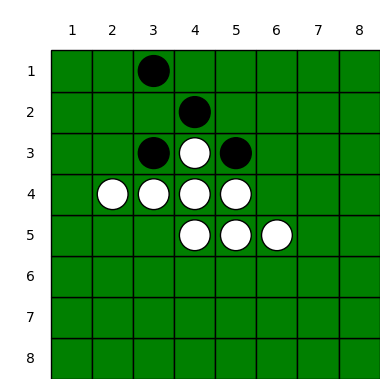

黒の番


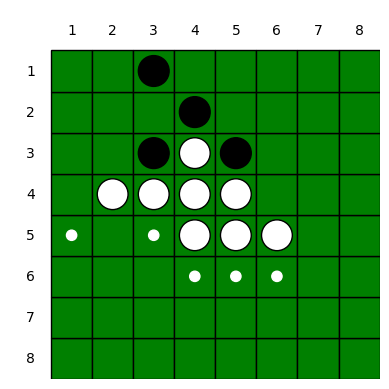

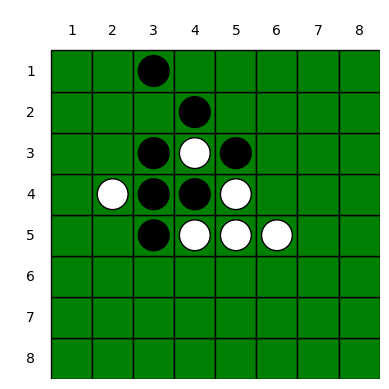

白の番


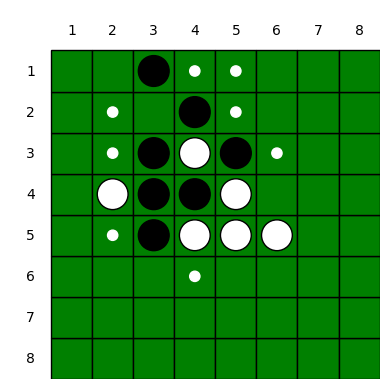

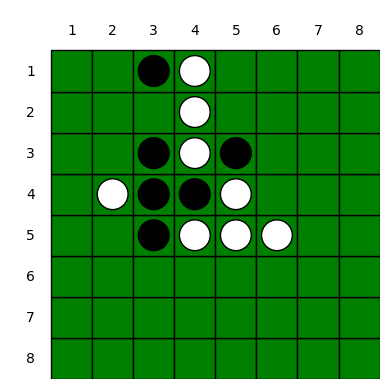

黒の番


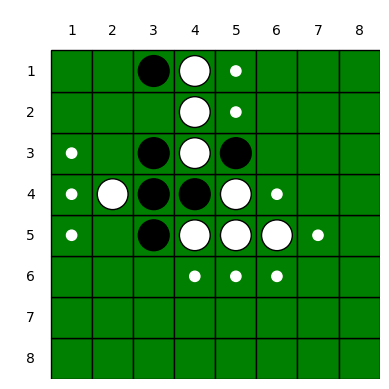

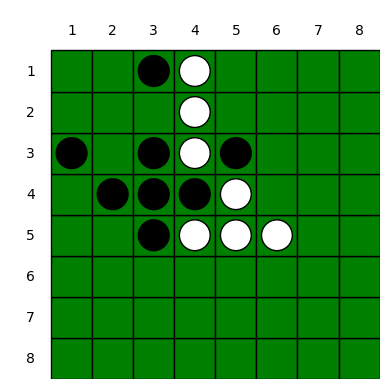

白の番


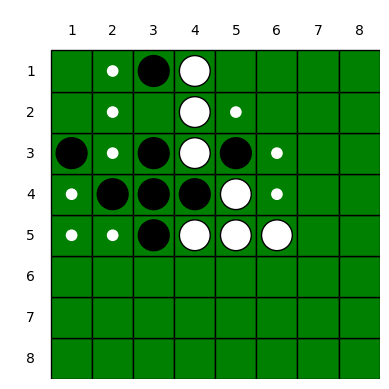

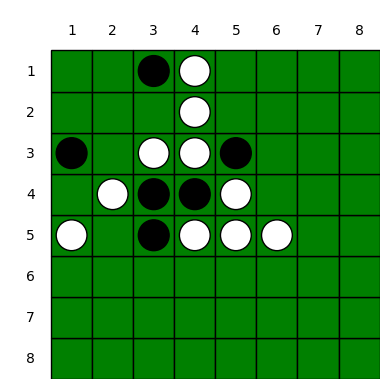

黒の番


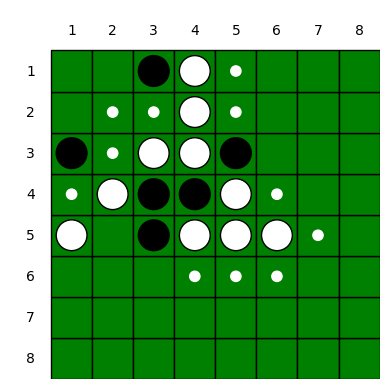

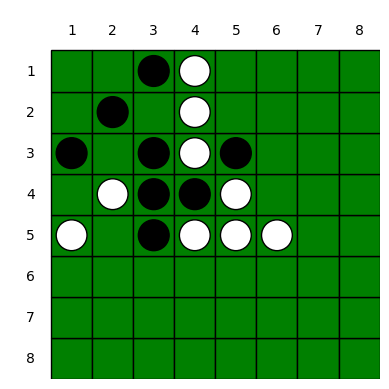

白の番


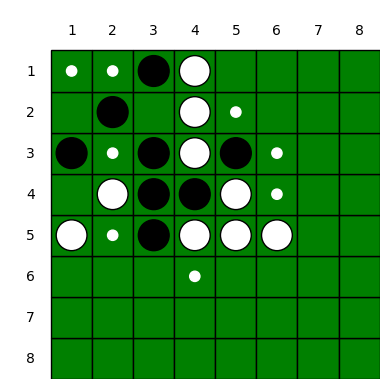

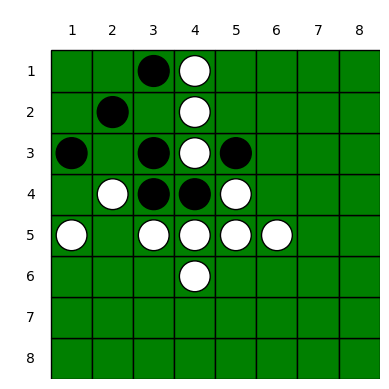

黒の番


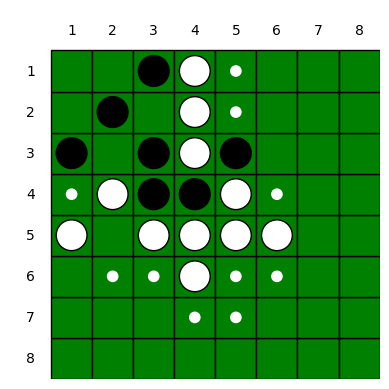

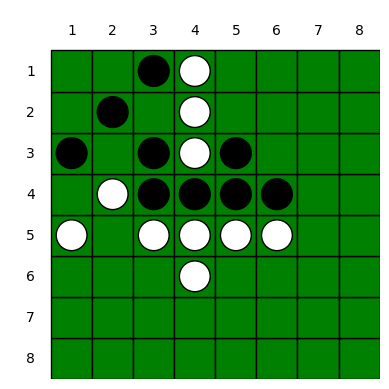

白の番


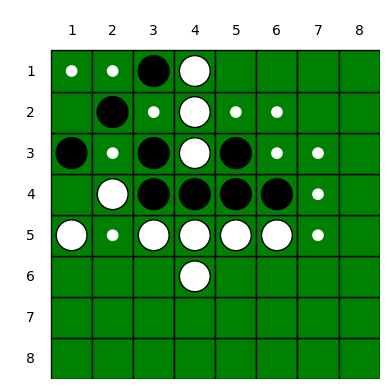

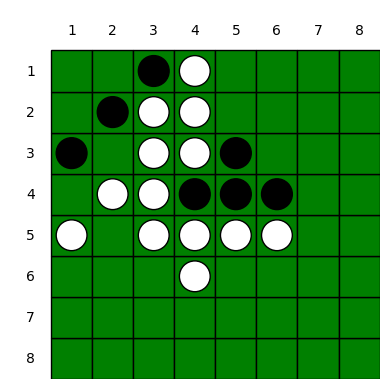

黒の番


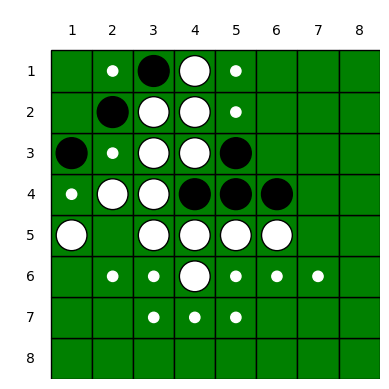

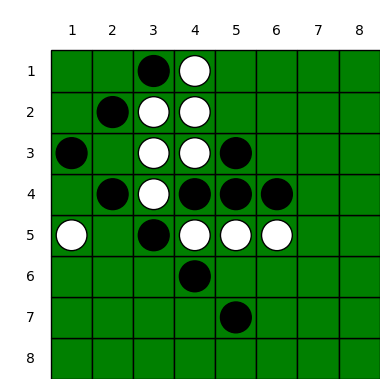

白の番


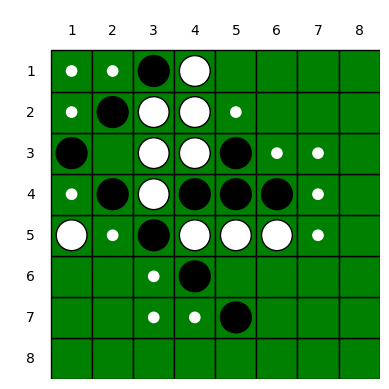

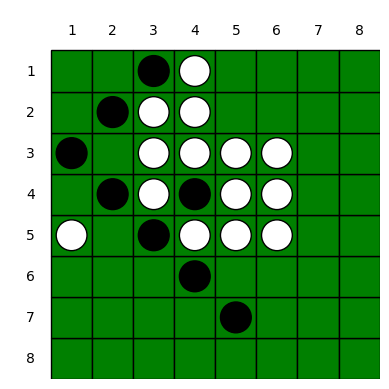

黒の番


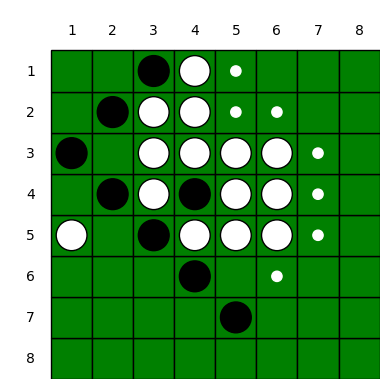

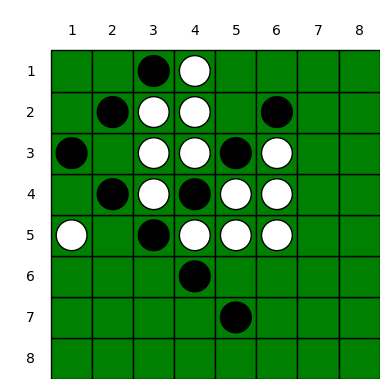

白の番


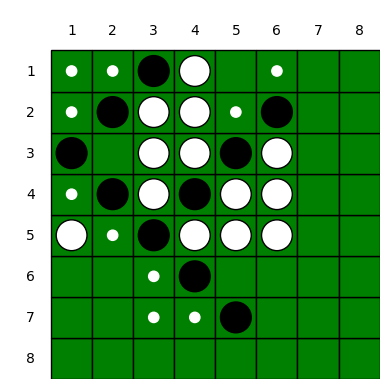

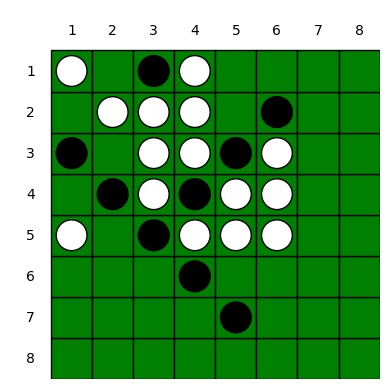

黒の番


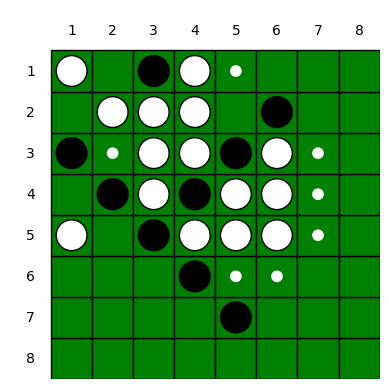

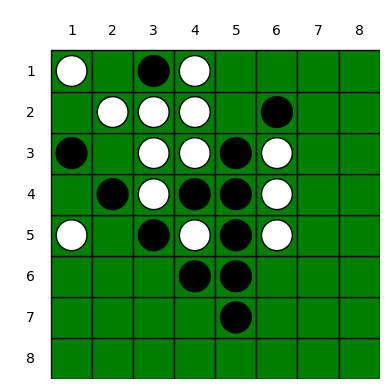

白の番


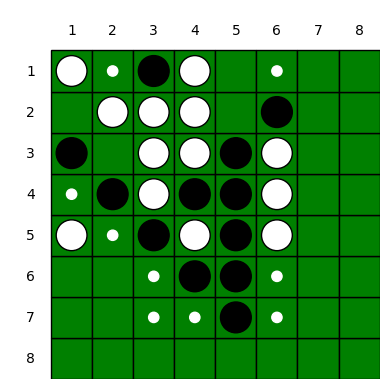

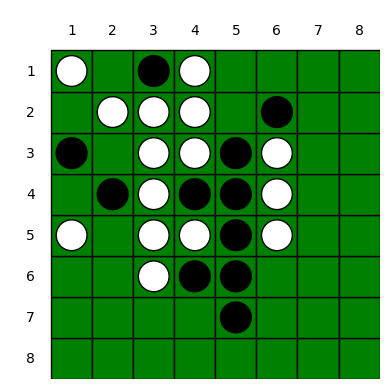

黒の番


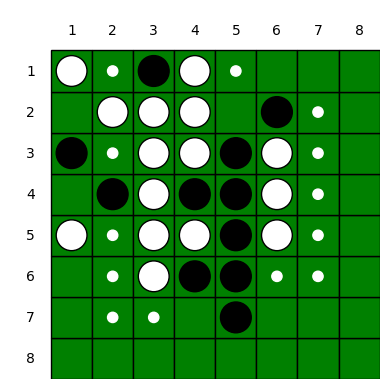

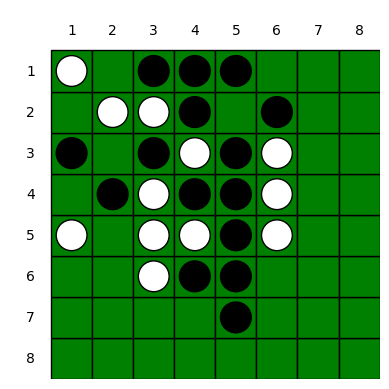

白の番


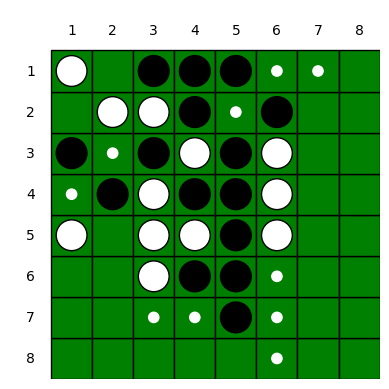

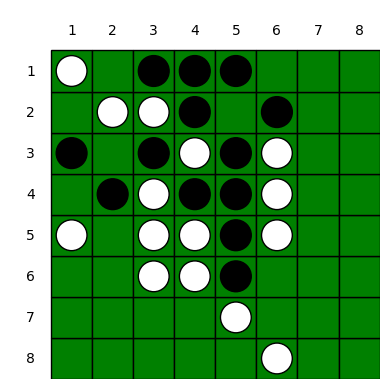

黒の番


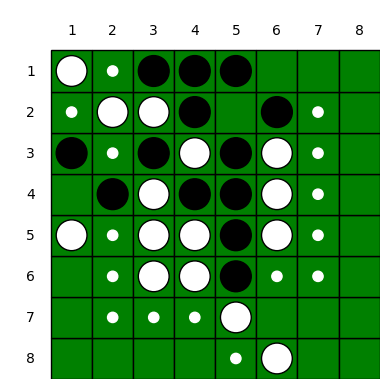

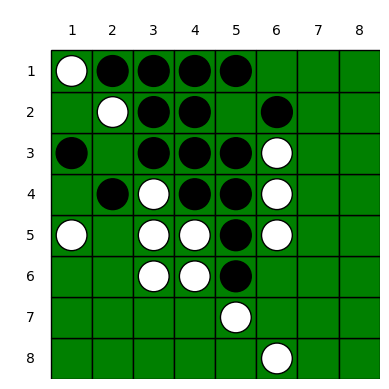

白の番


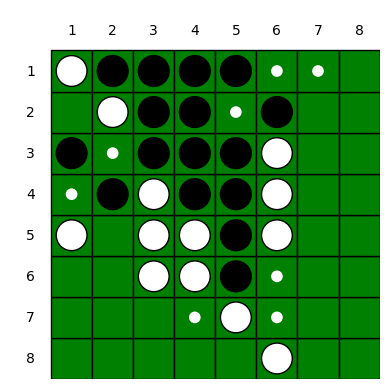

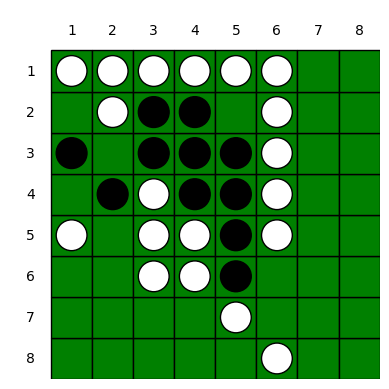

黒の番


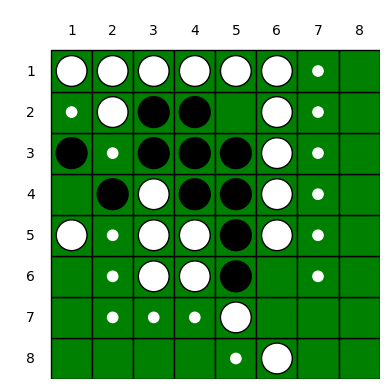

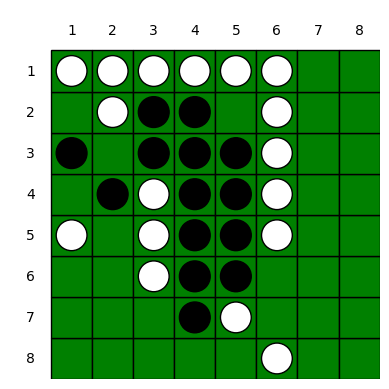

白の番


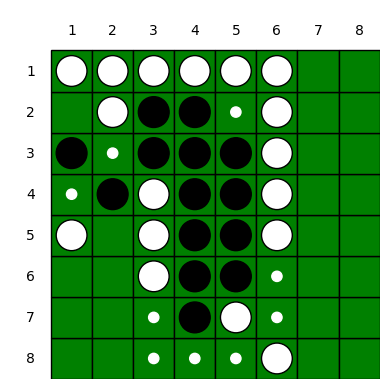

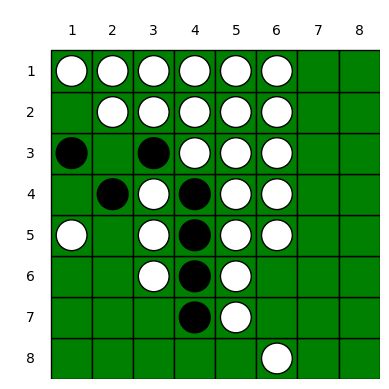

黒の番


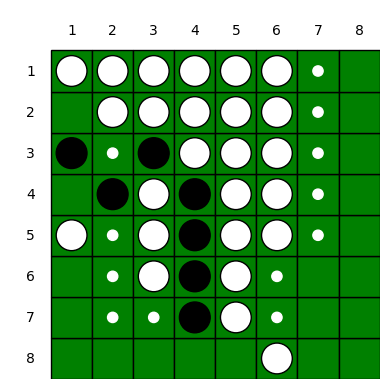

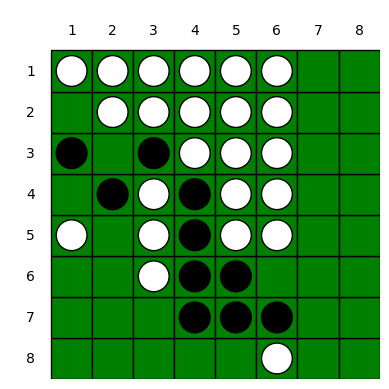

白の番


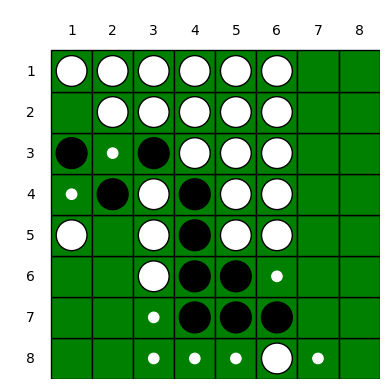

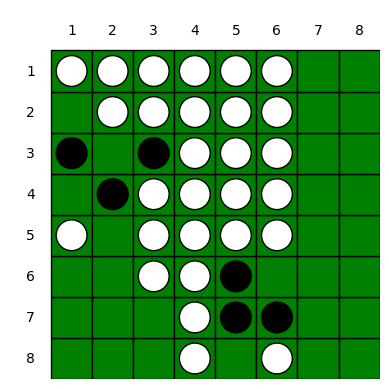

黒の番


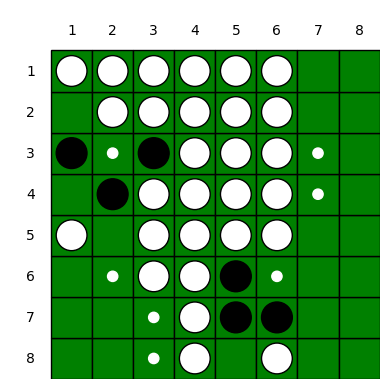

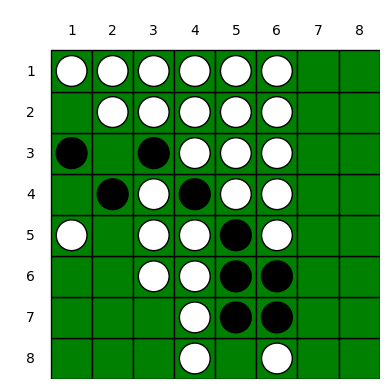

白の番


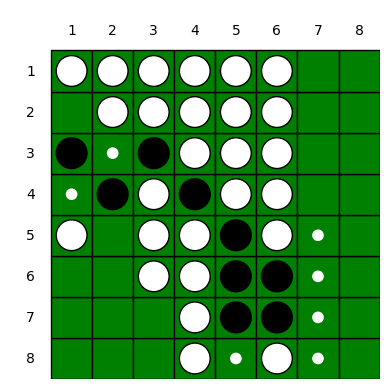

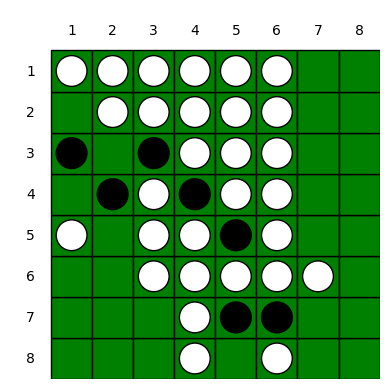

黒の番


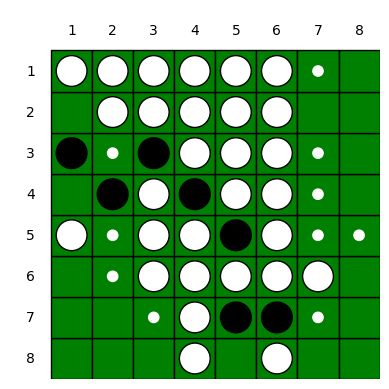

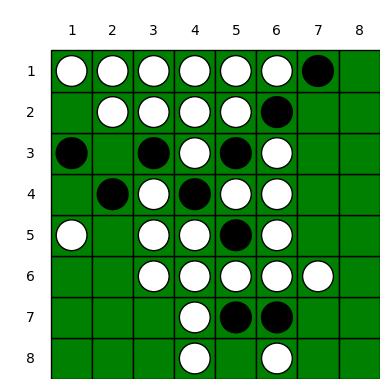

白の番


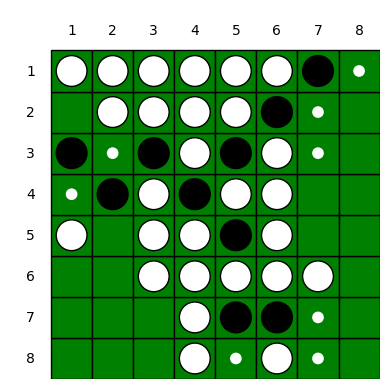

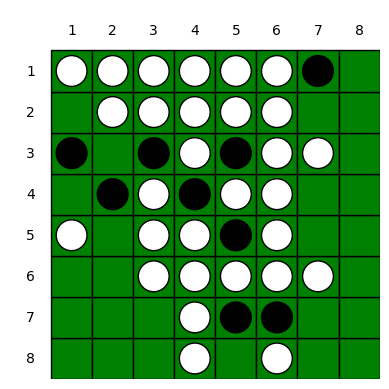

黒の番


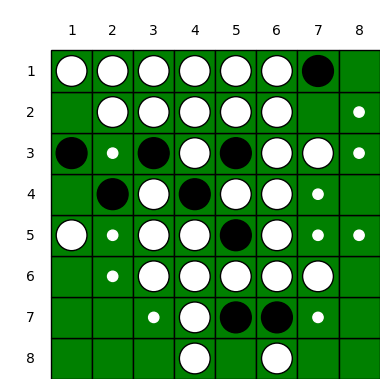

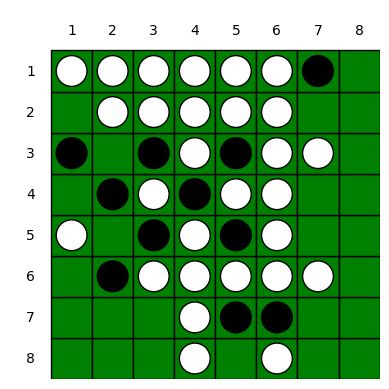

白の番


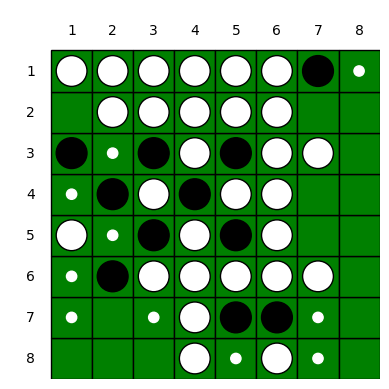

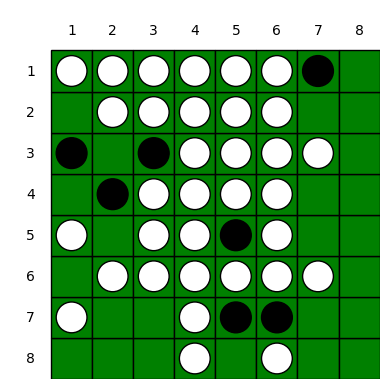

黒の番


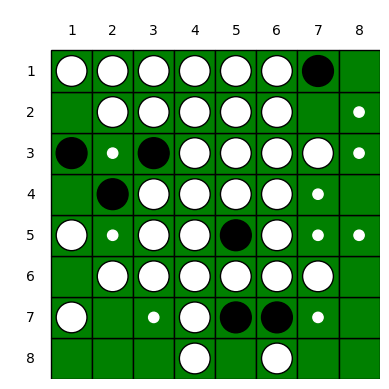

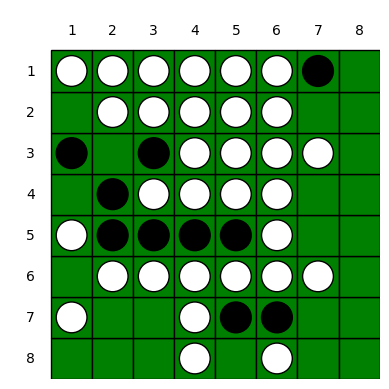

白の番


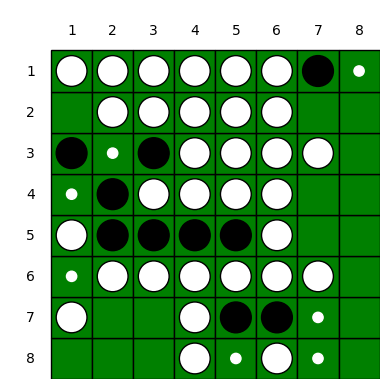

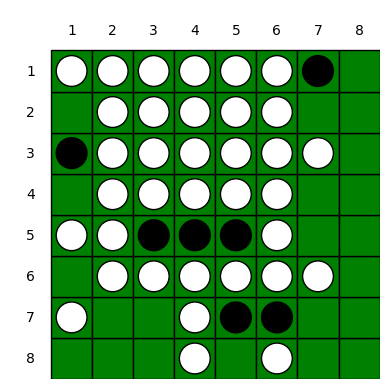

黒の番


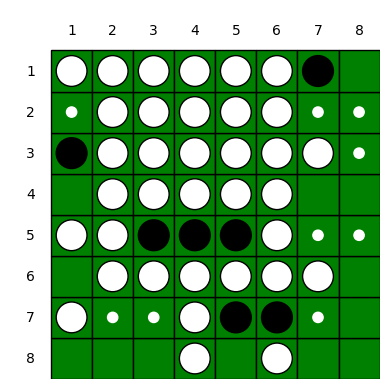

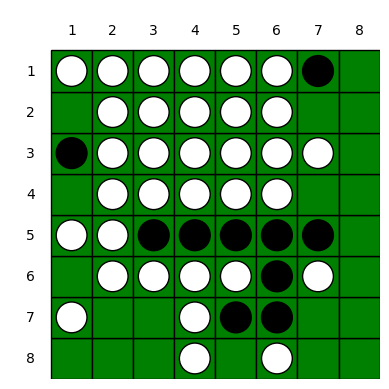

白の番


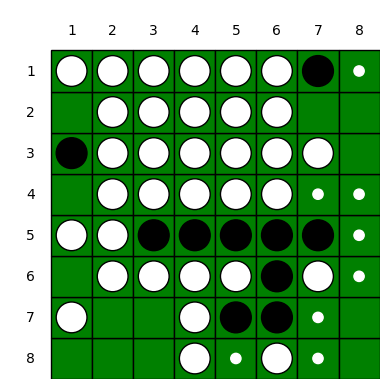

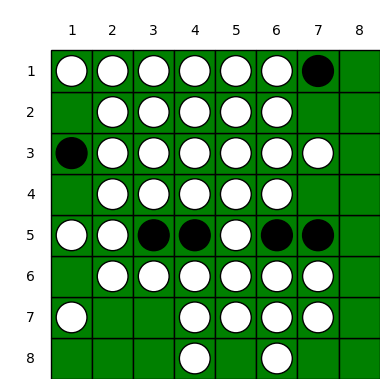

黒の番


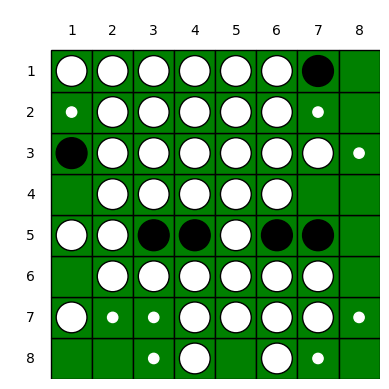

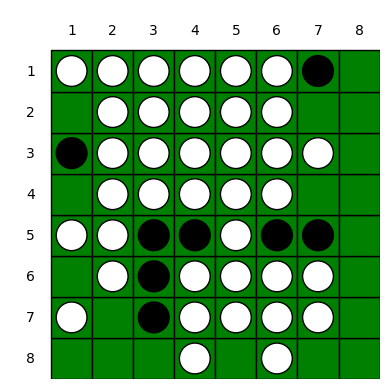

白の番


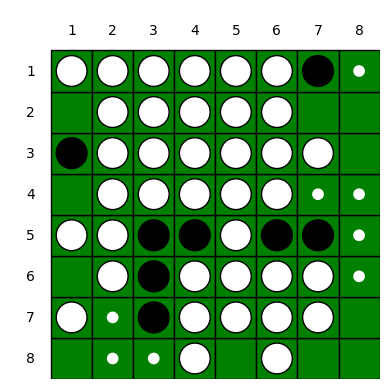

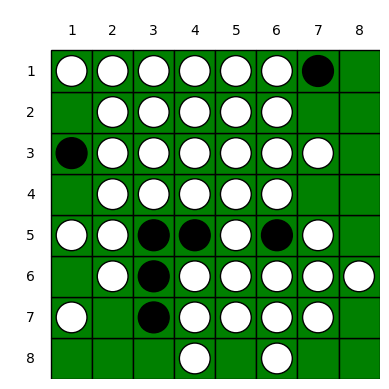

黒の番


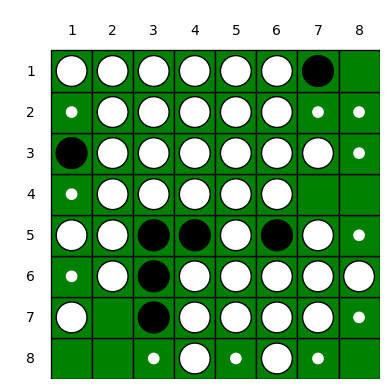

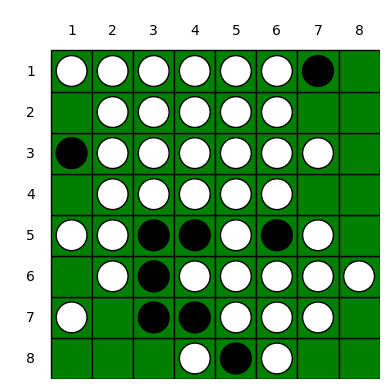

白の番


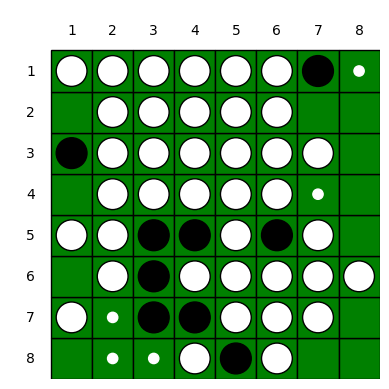

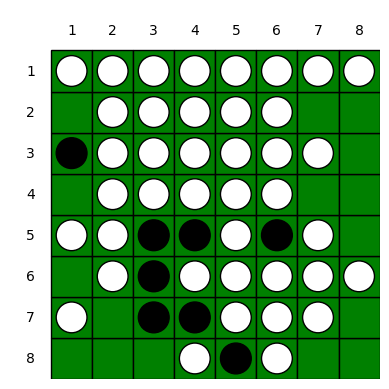

黒の番


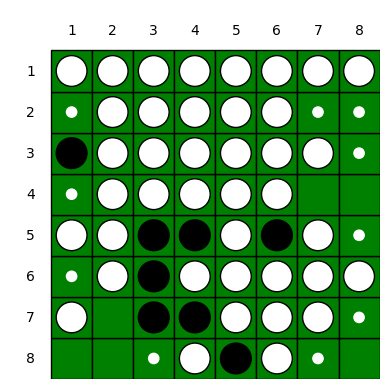

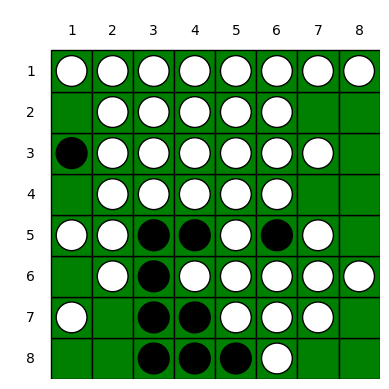

白の番


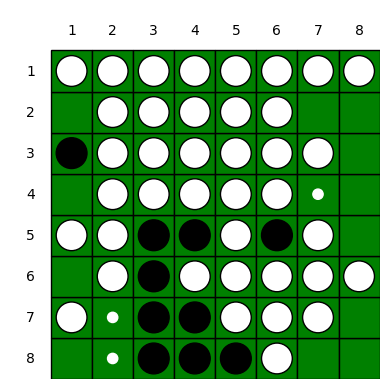

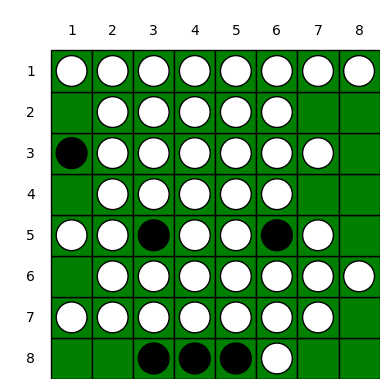

黒の番


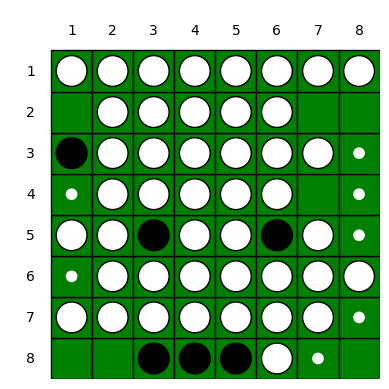

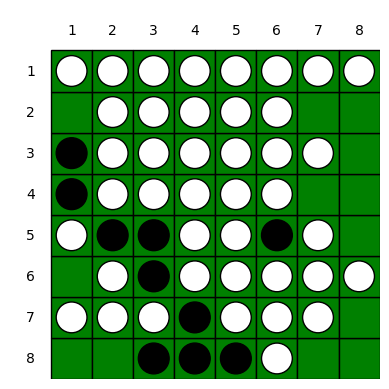

白の番


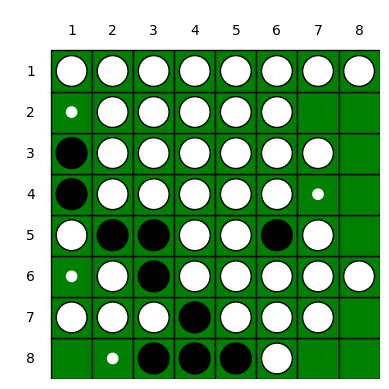

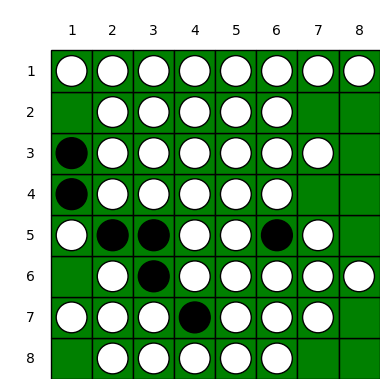

黒の番


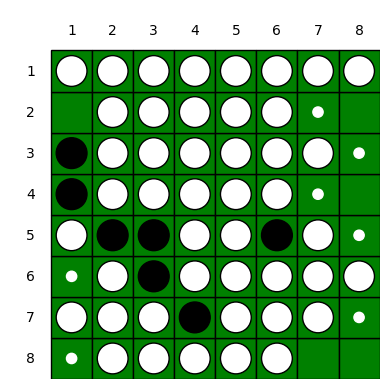

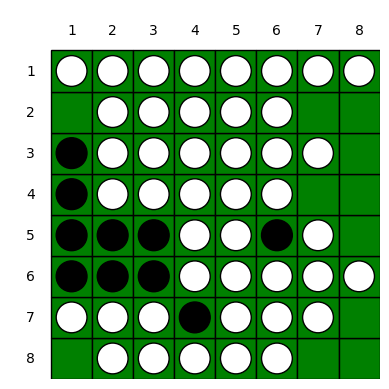

白の番


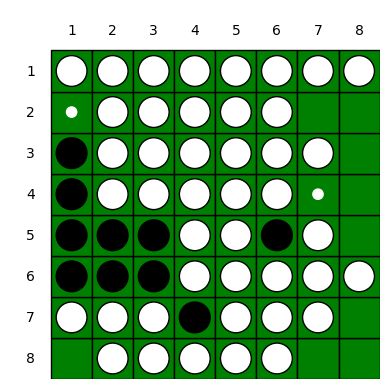

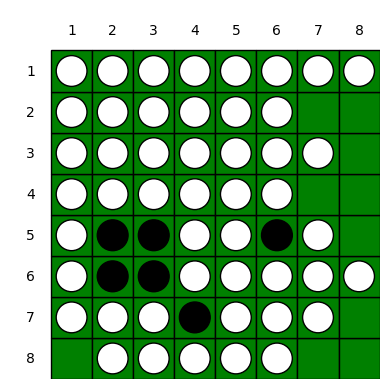

黒の番


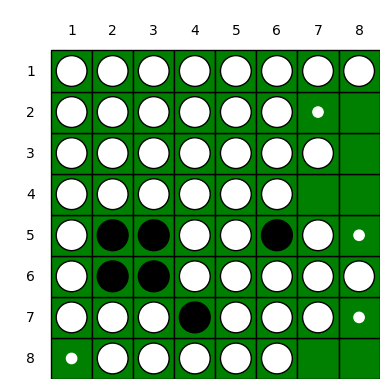

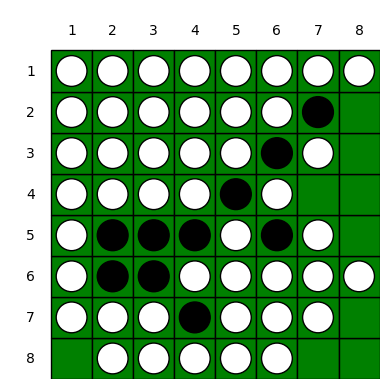

白の番


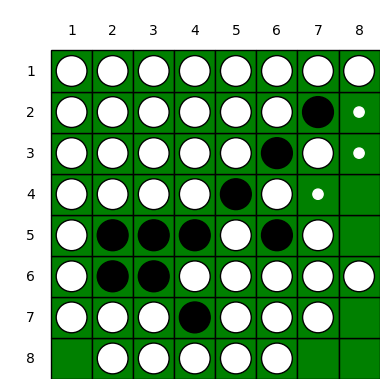

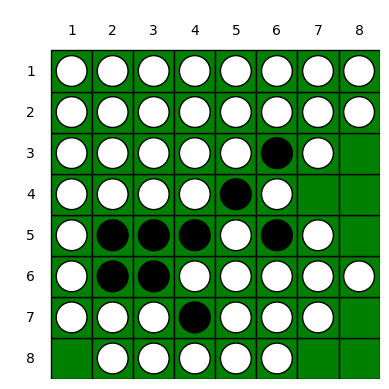

黒の番


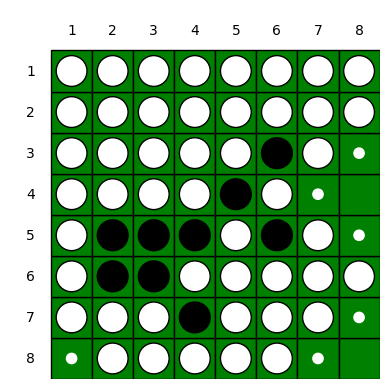

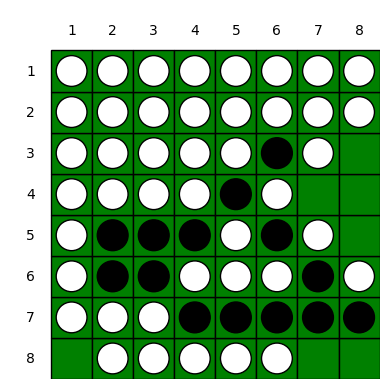

白の番


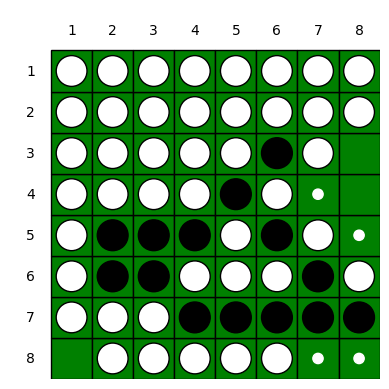

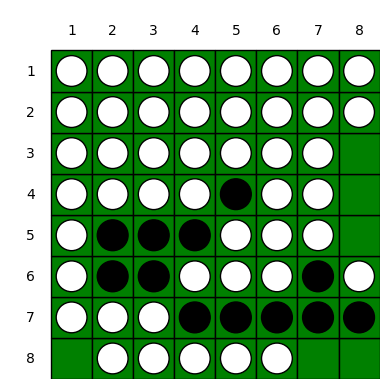

黒の番


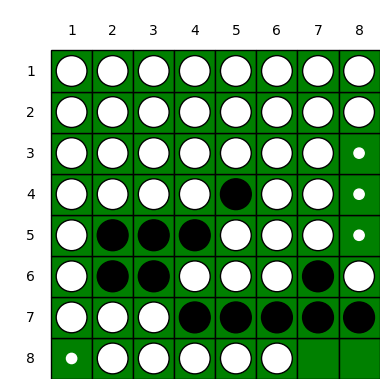

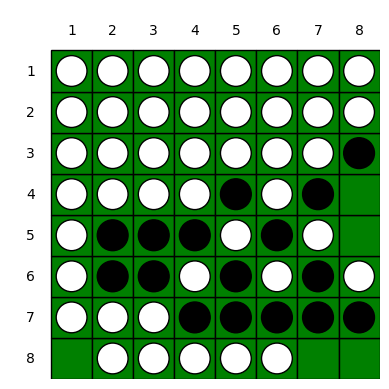

白の番


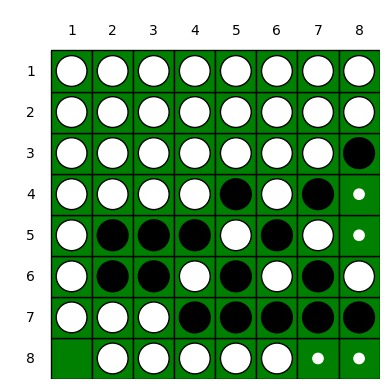

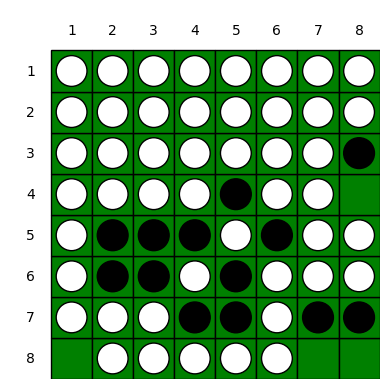

黒の番


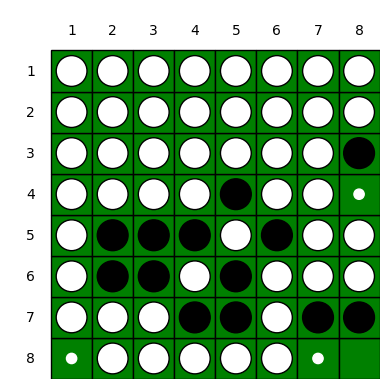

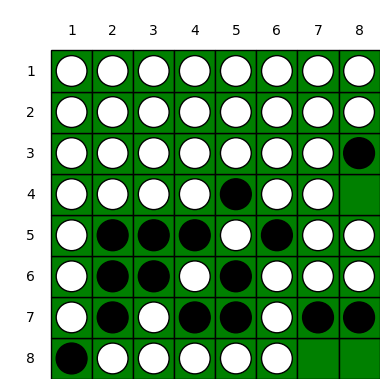

白の番


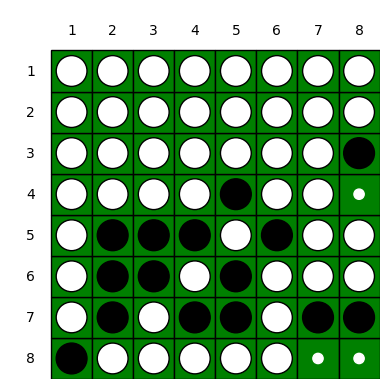

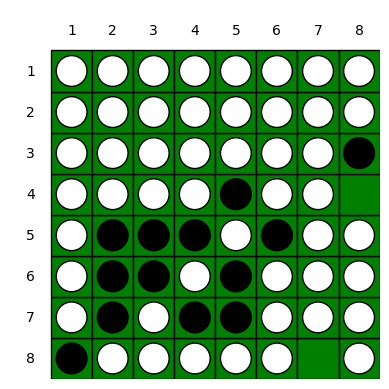

黒の番


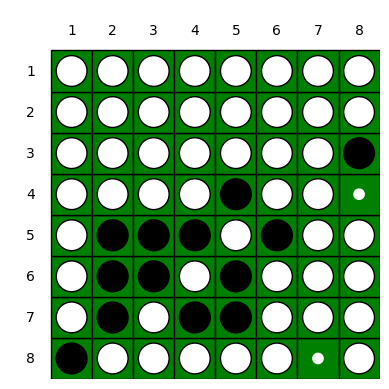

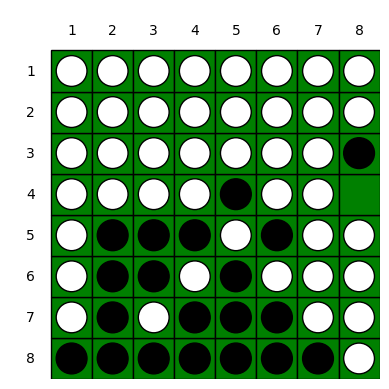

白の番


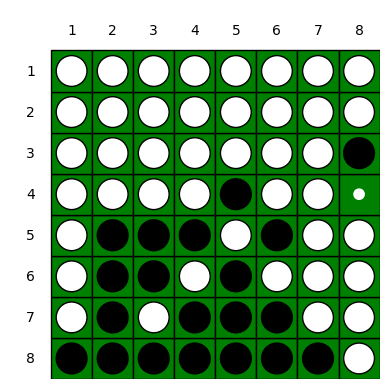

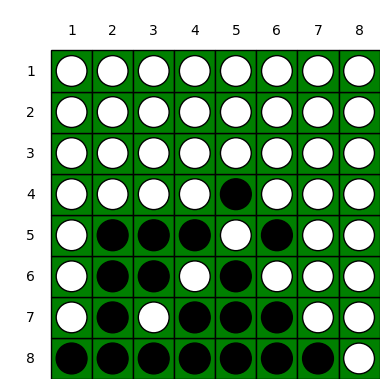

黒の番


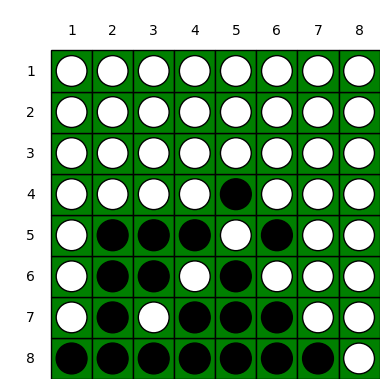

黒19:白45で白の勝ち！
ゲーム終了！


In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np



class reversi_game():

    def __init__(self,test=False,cpu_mode=False,cpu=-1):

        self.board=np.zeros((9,9))
        self.board[4,4]=1
        self.board[5,5]=1
        self.board[4,5]=-1
        self.board[5,4]=-1

        self.test=test
        self.cpu_mode=cpu_mode
        self.cpu=cpu

    def game_start(self):
        turn=1
        while True:
          if turn==1:
            print('黒の番')
          else:
            print('白の番')

          #-----おけるかどうかの判定＆おける場所の表示-----

          available_list=self.get_available_list(self.board,turn)
          self.make_board(self.board,available_list)
          #print(available_list)
          if available_list==[]:

              if self.get_available_list(self.board,-turn)==[]:
                  black_score=np.sum(self.board==1)
                  white_score=np.sum(self.board==-1)
                  if black_score>white_score:
                      print('黒{}:白{}で黒の勝ち！'.format(black_score,white_score))
                  elif black_score<white_score:
                      print('黒{}:白{}で白の勝ち！'.format(black_score,white_score))
                  else:
                      print('引き分け！')
                  print('ゲーム終了！')
                  break
              else:
                  print('置けないから相手のターンになるよ')           
                  turn=-turn
                  continue

          if self.test==False:

              #----入力-----

              if self.cpu_mode==True:
                  if turn==self.cpu:
                      random_choice=random.choice(available_list)
                      x = random_choice[0]
                      y = random_choice[1]
                  else:
                      x=input('行を選択してください(1-8): ')
                      if x =='':
                          continue 
                      y=input('列を選択してください(1-8): ')
                      if y =='':
                          continue 
              else:
                  x=input('行を選択してください(1-8): ')
                  if x =='':
                      continue 
                  y=input('列を選択してください(1-8): ')
                  if y =='':
                      continue  

              try:
                  x =int(x)
                  y =int(y)
              except ValueError:
                  print('整数で入力してね！！')
                  continue

              #-----数値確定ライン-----

              if (x<1)|(x>8)|(y<1)|(y>8):
                  print('1-8で入力してね！！')
                  continue 
              elif self.board[x,y]!=0:
                  print('そこはもう埋まってる！！')
                  continue
              else:

                  turn,self.board=self.judge(self.board,x,y,turn)

          else:
              random_choice=random.choice(available_list)
              x = random_choice[0]
              y = random_choice[1]

              turn,self.board=self.judge(self.board,x,y,turn)



    def make_board(self,board,able_list=[]):
        i=0
        fig,ax=plt.subplots()
        for y in range(9):  
            for x in range(9): 
                x_=x*80
                y_=y*80
                if (x==0)|(y==8):
                    if i==8:
                      point=None
                      i+=1
                    else:
                      point=abs(8-i)
                      i+=1
                    ax.text(x_+40,y_+40,point,ha="center",va="center",fontsize=10)                   
                else:
                    rectangle = plt.Rectangle((x_,y_),80,80,edgecolor="black",facecolor="green")
                    ax.add_patch(rectangle)

        for x in range(9):
            for y in range(9):
                if int(board[x][y])==1:
                    circle = plt.Circle((x*80+40,680-y*80),30,edgecolor="black",facecolor="black")
                    ax.add_patch(circle)
                elif int(board[x][y])==-1:
                    circle = plt.Circle((x*80+40,680-y*80),30,edgecolor="black",facecolor="white")
                    ax.add_patch(circle)
                elif (x,y) in able_list:
                    circle = plt.Circle((x*80+40,680-y*80),10,edgecolor="white",facecolor="white")
                    ax.add_patch(circle)

        plt.xlim(0,720)
        plt.ylim(0,720)
        ax.set_aspect('equal',adjustable='box')
        plt.axis("off")
        plt.show()

    def update_board(self,board,x,y,color):

        board[x,y]=color
        #縦制御
        for i in range(1,x):
            if board[x-i,y]==color:
                board[x-i:x,y]=color
                break
            elif board[x-i,y]==0:
                break
            else:
                continue

        for i in range(1,9-x):
            if board[x+i,y]==color:
                board[x:x+i,y]=color
                break
            elif board[x+i,y]==0:
                break 
            else:
                continue
        #横制御
        for i in range(1,y):
            if board[x,y-i]==color:
                board[x,y-i:y]=color
                break
            elif board[x,y-i]==0:
                break
            else:
                continue

        for i in range(1,9-y):
            if board[x,y+i]==color:
                board[x,y:y+i]=color
                break
            elif board[x,y+i]==0:
                break
            else:
                continue

        #斜め制御-左上・右下
        for i in range(1,min(x,y)+1):
            if (x-i<1)|(y-i<1):
                break
            if board[x-i,y-i]==color:
                for c in range(i):
                    board[x-c,y-c]=color
                break
            elif board[x-i,y-i]==0:
                break
            else:
                continue

        for i in range(1,min(9-x,9-y)+1):
            if (x+i>8)|(y+i>8):
                break         
            if board[x+i,y+i]==color:
                for c in range(i):
                    board[x+c,y+c]=color
                break
            elif board[x+i,y+i]==0:
                break
            else:
                continue

        #斜め制御-右上・左下
        for i in range(1,min(9-x,y)+1):
            if (x+i>8)|(y-i<1):
                break
            if board[x+i,y-i]==color:
                for c in range(i):
                    board[x+c,y-c]=color
                break
            elif board[x+i,y-i]==0:
                break
            else:
                continue

        for i in range(1,max(x,9-y)+1):
            if (x-i<1)|(y+i>8):
                break
            if board[x-i,y+i]==color:
                for c in range(i):
                    board[x-c,y+c]=color
                break
            elif board[x-i,y+i]==0:
                break
            else:
                continue

        return board

    def judge(self,board,x,y,turn=1,ab_list=[],mode_available=False):
        board_p=board.copy()
        board_p=self.update_board(board_p,x,y,color=turn)
        if abs((board-board_p).sum())==1:
            if mode_available==True:
                return turn,board
            else:
                print('置けないよ')
                self.make_board(board,ab_list)
                return turn,board
        else:
            if mode_available==True:
                return -turn,board
            else:
                self.make_board(board_p,ab_list)
                return -turn,board_p

    def get_available_list(self,board,turn):
        available_list=[]

        for y in range(1,9):
            for x in range(1,9):
                turn_=turn
                if board[x,y]==0:
                    turn_out,board=self.judge(board,x,y,turn_,ab_list=[],mode_available=True)

                    if turn_out!=turn_:
                        available_list.append((x,y))

        return available_list



game=reversi_game(test=True,cpu_mode=False,cpu=-1)
game.game_start()